In [1]:
import os
import sys
from IPython.display import display, clear_output
import tensorflow as tf

sys.path.append(os.path.abspath("../"))
from src.utils import reload_script
from models_src.Support import LRCallback

clear_output(wait=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1732878214.364076   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732878214.375812   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732878214.375958   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# set up databases
config_path = "../exp_lib/general_config/pixel_features.json"
%run -i ../exp_lib/datasets_generators/pixel_features.py {config_path}
clear_output(wait=True)

I0000 00:00:1732878216.944594   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732878216.944744   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732878216.944775   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732878217.336841   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732878217.337043   56838 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-29

In [3]:
# set up mlflow instance
%run -i ../exp_lib/mlflow/local_experiment.py {cfg.experiment_name}

In [4]:
# set up Trainer
model_def_path = "../exp_lib/model_def/radial_enc_pixel_features_backboned.json"
#model_def_path = "../exp_lib/model_def/radial_enc_pixel_features_pure.json"
trainer = None
%run -i ../exp_lib/utils/trainer_loader.py {model_def_path}

GridBox(children=(Text(value='carefree-gnat-93', description='run_name', layout=Layout(height='30px', width='3…

Button(description='Pass Parameters', style=ButtonStyle())

GridBox(children=(Text(value='frequency', description='enc_type', layout=Layout(height='30px', width='300px'),…

Button(description='Accept Parameters', style=ButtonStyle())

Dictionary updated: {'enc_type': 'frequency', 'num_heads': 2, 'embs_dim': 128, 'color_embs_dim': 64, 'size': 32, 'embs_mid_layers': 2, 'dropout': 0.0, 'activation': 'relu', 'out_mid_layers': 2, 'attns_num': 3, 'concat_memory': True, 'progressive': False, 'inverted_angle': True, 'backbone_def': {'run_name': 'carefree-gnat-93', 'load_mlflow_weights': True, 'load_mode': 'mlflow'}, 'backbone_trainable': False, 'backbone_last_layer': 'Up-Conv_2', 'backbone_init_layer': 'Batch-Normalization'}


(1, 1024, 1024, 64) (None, 1024, 128)


/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "PxFeaturesRadEnc"


/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Conne
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━
│ unet_input (InputLayer)     │ (None, 32, 32, 3)       │              0 │ -    
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Batch-Normalization         │ (None, 32, 32, 3)       │             12 │ unet_
│ (BatchNormalization)        │                         │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_1 (UNetConvBlock) │ [(None, 16, 16, 64),    │         75,648 │ Batch
│                             │ (None, 32, 32, 64)]     │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_2 (UNetConvBlock) │ [(None, 8, 8, 128),     │        369,024 │ Down-
│                           

In [5]:
trainer.train_model(
    epochs = 80,
    callbacks = [LRCallback(warmup_lr=1e-5, warmup_epochs=1, decay_ratio=0.96)],
    log = True,
    export_final_state = True,
    export_model = False,
    export_model_def = True
)

2024-11-29 12:05:47.609732: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_19', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_sine_subtract_fusion_1', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1732878347.687980   57013 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - angle_loss: 0.1002 - center_vec_loss: 0.2383 - loss: 0.7777 - shape_class_F1: 0.4093 - shape_class_loss: 0.1294 - thickness_loss: 0.3097

2024-11-29 12:06:18.480958: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5', 12 bytes spill stores, 12 bytes spill loads

2024-11-29 12:06:18.696947: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 316 bytes spill stores, 268 bytes spill loads

2024-11-29 12:06:20.596848: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 168 bytes spill stores, 168 bytes spill loads

2024-11-29 12:06:20.807152: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10', 316 bytes spill stores, 268 bytes spill loads

2024-11-29 12:06:21.889074: I external/local_xla/xla/stream_exec

512/512 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - angle_loss: 0.1002 - center_vec_loss: 0.2382 - loss: 0.7773 - shape_class_F1: 0.4096 - shape_class_loss: 0.1294 - thickness_loss: 0.3095 - val_angle_loss: 0.0646 - val_center_vec_loss: 0.1192 - val_loss: 0.3710 - val_shape_class_F1: 0.8315 - val_shape_class_loss: 0.0675 - val_thickness_loss: 0.1196 - learning_rate: 1.0000e-05
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - angle_loss: 0.0360 - center_vec_loss: 0.0887 - loss: 0.2460 - shape_class_F1: 0.9291 - shape_class_loss: 0.0252 - thickness_loss: 0.0961 - val_angle_loss: 0.0252 - val_center_vec_loss: 0.0585 - val_loss: 0.1878 - val_shape_class_F1: 0.9638 - val_shape_class_loss: 0.0180 - val_thickness_loss: 0.0861 - learning_rate: 0.0010
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - angle_loss: 0.0242 - center_vec_loss: 0.0524 - loss: 0.1448 - shape_class_F1: 0.9703 - shape_class_loss: 0.0145 - thickness_loss: 0.0537 - val_angle_loss: 0.0236 - val_center_vec_loss: 0.0597

2024/11/29 12:29:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run silent-gnat-509 at: http://localhost:5000/#/experiments/806955696090293906/runs/13b60d35daf143ababdbcc2247a38cbd.
2024/11/29 12:29:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/806955696090293906.


In [ ]:
trainer.upload_weights_to_mlflow()

In [ ]:
from exp_lib.utils.load_mlflow_model import load_mlflow_model
model = load_mlflow_model(run_name='carefree-gnat', load_weights=True, compile=True)

In [6]:
# Metric validation
%run -i ../exp_lib/metric_validation/unet_pixel_features.py --upload=1

2024-11-29 12:30:43.421042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 336 bytes spill stores, 288 bytes spill loads



256/256 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - val_shape_class_loss: 0.0324 - val_angle_loss: 0.0825 - val_thickness_loss: 0.2325 - val_center_vec_loss: 0.1949
loss_value: 0.1355636


2024/11/29 12:30:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run silent-gnat-509 at: http://localhost:5000/#/experiments/806955696090293906/runs/13b60d35daf143ababdbcc2247a38cbd.
2024/11/29 12:30:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/806955696090293906.


[0.9999208, 0.99839497, 0.9970989]


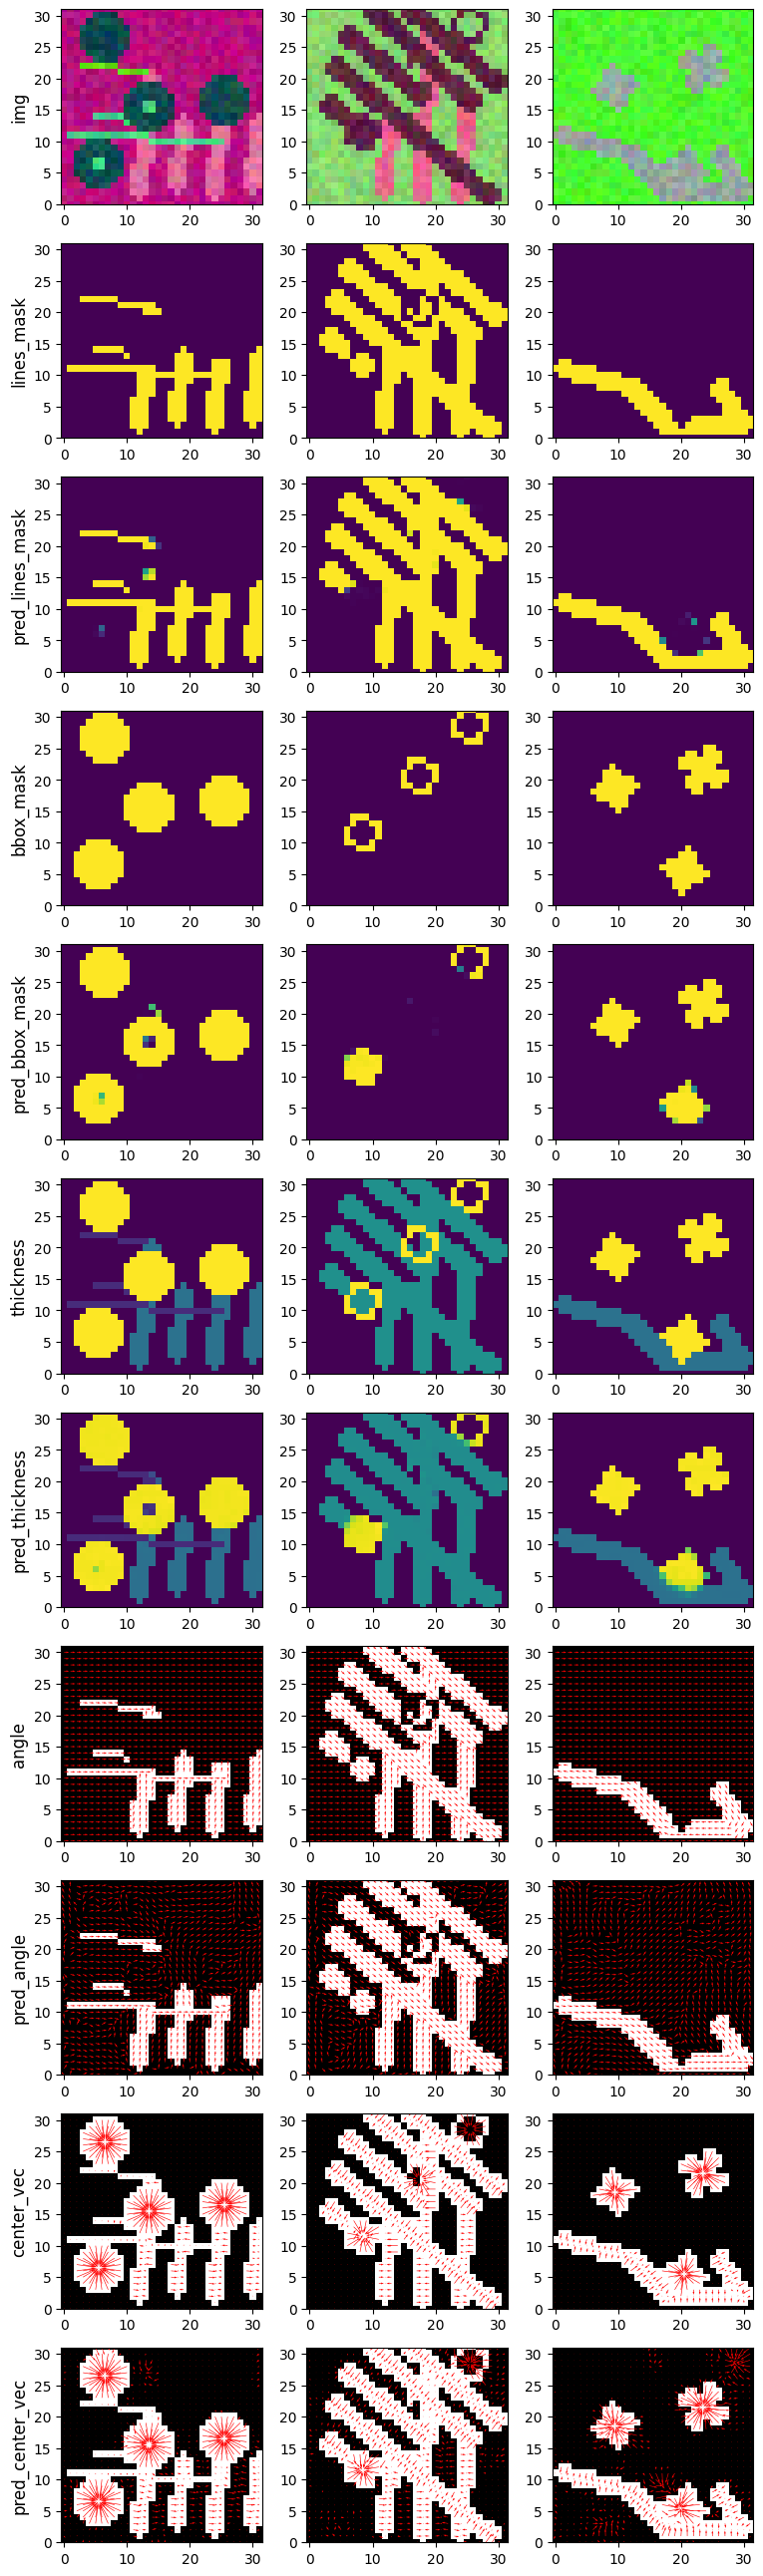

In [7]:
# Plot results
%run -i ../exp_lib/plots/unet_pixel_features.py --s=5

# MHA weights

In [49]:
from models_src.fft_lib import encode1Dcoords

In [50]:
inter_model = tf.keras.Model(trainer.model.input, (trainer.model.get_layer('MHA_1').output[0], 
                                                   trainer.model.get_layer('MHA_1').output[1], 
                                                   trainer.model.get_layer('RSFE').output[1]))

learned_pos_enc, attn_mask, pos_enc = inter_model(img, training=False)
learned_pos_enc = tf.matmul(attn_mask[:,0,:,tf.newaxis], pos_enc)[:,:,0]
print(learned_pos_enc.shape, attn_mask.shape, pos_enc.shape)
flat_coord = encode1Dcoords(tf.constant([18,5]), width=32)[0]

sub_attn_mask = tf.reshape(attn_mask[1,0,flat_coord], (32,32))
sub_learned_pos_enc = learned_pos_enc[1,flat_coord,tf.newaxis]
sub_pos_enc = pos_enc[0,flat_coord]

print(sub_learned_pos_enc.shape, sub_pos_enc.shape)

learned_pos_map = tf.matmul(sub_learned_pos_enc, sub_pos_enc, transpose_b=True)
print(learned_pos_map.shape)
learned_pos_map = tf.reshape(learned_pos_map, (32,32))

(8, 1024, 64) (8, 2, 1024, 1024) (1, 1024, 1024, 64)
(1, 64) (1024, 64)
(1, 1024)


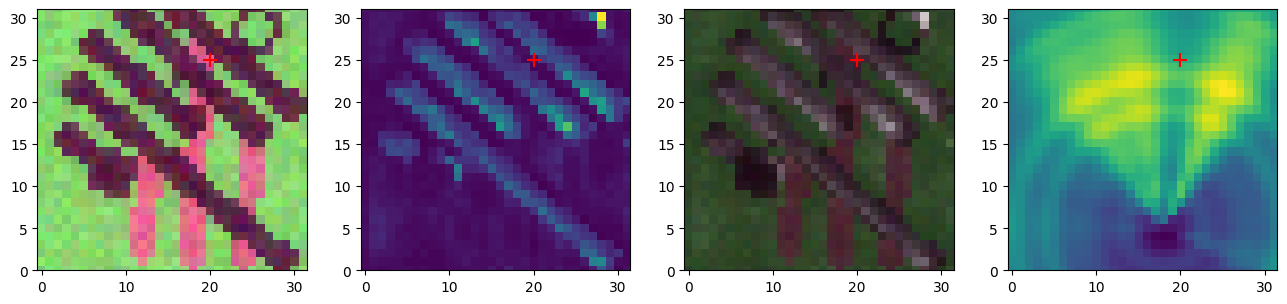

In [51]:

fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(img[1])
axs[1].imshow(sub_attn_mask)

axs[2].imshow(img[1])
axs[2].imshow(sub_attn_mask, cmap='gray', alpha=0.7)

axs[3].imshow(learned_pos_map)
for i in range(4):
    axs[i].scatter(20,25, marker='+', color='red', s=100)
    axs[i].set_ylim(0,31)